# Decision Trees and Random Forests in Python

Decision Trees are flowchart-like structures that represent all possible solutions to a decision based on certain conditions. They are used to make decisions based on previous experience. In order to create a decision tree, all data must be numerical. The feature columns are the columns from which predictions are made, and the target column is the column with the values to be predicted.

On the other hand, Random Forests are a popular supervised machine learning algorithm. They are an ensemble method, meaning they combine predictions from other models. Each of the smaller models in the random forest ensemble is a decision tree. Random forests can be used for both classification and regression. In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree provides its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result. For regression, predictions use an averaging technique instead.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


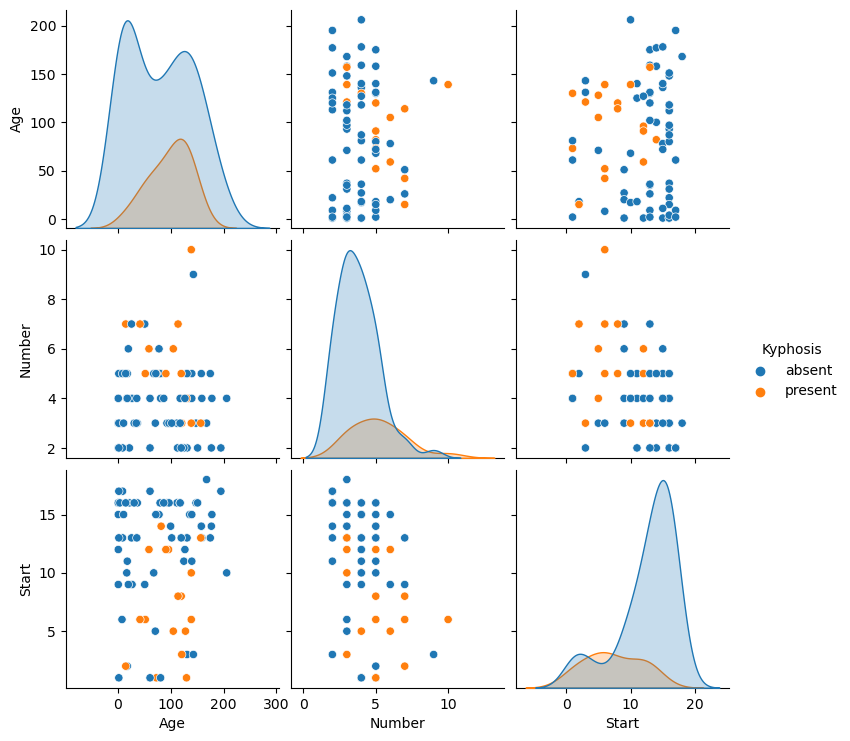

In [5]:
sns.pairplot(df, hue= 'Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis', axis=1)

In [9]:
y= df['Kyphosis']

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [48]:
from sklearn.tree import DecisionTreeClassifier

Prediction and Evaluation
Let's evaluate our decision tree.

In [49]:
dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
predictions = dtree.predict(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25



In [54]:
print(confusion_matrix(y_test,predictions))

[[18  2]
 [ 3  2]]


# Random Forests

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
rfc_pred = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[20  0]
 [ 3  2]]


              precision    recall  f1-score   support

      absent       0.87      1.00      0.93        20
     present       1.00      0.40      0.57         5

    accuracy                           0.88        25
   macro avg       0.93      0.70      0.75        25
weighted avg       0.90      0.88      0.86        25



In [58]:
#the dataset is small unballanced 

# Tree Visualization

In [59]:
from IPython.display import Image
import six
from sklearn.tree import export_graphviz
from io import StringIO

import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

I have stopped my work here because i dont have enough space to install something new

[Text(0.3815789473684211, 0.9375, 'Start <= 8.5\ngini = 0.337\nsamples = 56\nvalue = [44, 12]\nclass = Absent'),
 Text(0.15789473684210525, 0.8125, 'Start <= 1.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]\nclass = Present'),
 Text(0.10526315789473684, 0.6875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Absent'),
 Text(0.21052631578947367, 0.6875, 'Number <= 3.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = Present'),
 Text(0.10526315789473684, 0.5625, 'Age <= 64.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Absent'),
 Text(0.05263157894736842, 0.4375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Absent'),
 Text(0.15789473684210525, 0.4375, 'Number <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Absent'),
 Text(0.10526315789473684, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Absent'),
 Text(0.21052631578947367, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Present'),
 Text(0.3157894736842105, 0.5625, 'Age <= 141.0\ngini = 0.24

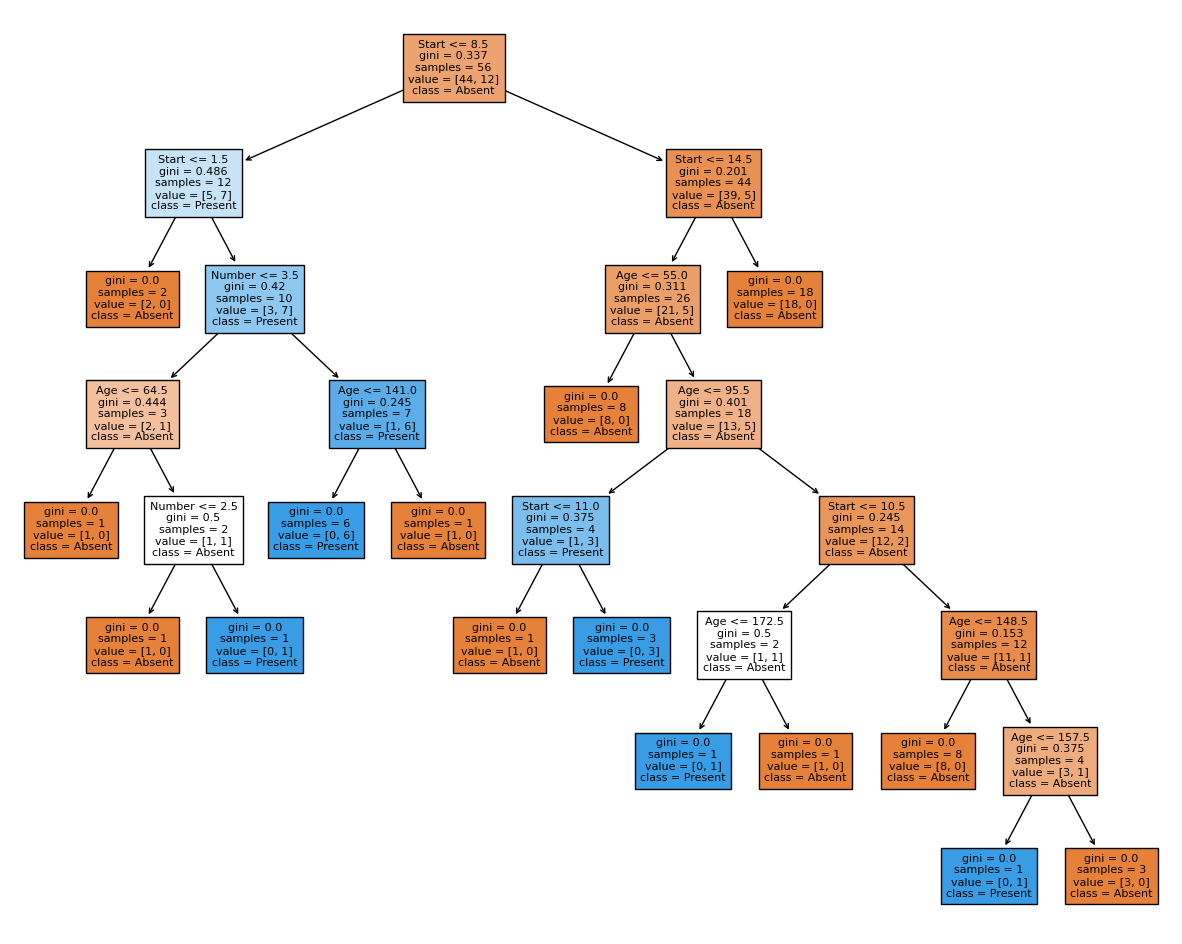

In [60]:
from sklearn import tree
plt.figure(figsize=(15, 12))
tree.plot_tree(dtree, filled=True, fontsize=8, feature_names=X_train.columns, class_names=['Absent', 'Present'])

